In [1]:
# Import requests and pafy libraries
import requests
import pafy

In [8]:
# Define the channel ID and the API key
channel_id = "UC-Lq6oBPTgTXT_K-ylWL6hg" # freeCodeCamp.org channel ID
api_key = "------" # replace with your API key

In [9]:
# Define the base URL for the YouTube Data API
base_url = "https://www.googleapis.com/youtube/v3/search"

In [10]:
# Define an empty list to store the video IDs
video_ids = []

# Define a variable to store the next page token
next_page_token = None

In [11]:
# Loop until there are no more pages
while True:
  # Define the parameters for the API request
  params = {
    "key": api_key,
    "channelId": channel_id,
    "part": "snippet,id",
    "order": "date",
    "maxResults": 50,
    "pageToken": next_page_token
  }

  # Make the API request and get the JSON response
  response = requests.get(base_url, params=params).json()

  # Loop through the items in the response and append the video IDs to the list
  for item in response["items"]:
    # Check if the item is a video
    if item["id"]["kind"] == "youtube#video":
      # Append the video ID to the list
      video_ids.append(item["id"]["videoId"])

  # Check if there is a next page token in the response
  if "nextPageToken" in response:
    # Update the next page token variable
    next_page_token = response["nextPageToken"]
  else:
    # Break the loop
    break

In [48]:
keys = ["id", "title", "description", "upload_date", "uploader", "duration", "view_count", "webpage_url", "categories", "tags"]

meta_list=[]

# Loop through the video IDs in the list
for video_id in video_ids:
  # Create a pafy object for each video ID
  # Only some elements of the dictionary returned by the object are useful. So, extract them 
  # using the list of keys above
  obj=pafy.new(video_id).__dict__['_ydl_info']
  selected_meta = {k: obj.get(k, None) for k in keys}

  # Apped the dictionary subset to the list 
  meta_list.append(selected_meta)

In [55]:
#Write the list of metadata Dictionaries into a file
import json

# Open the file in write mode
with open("foodloverstv-metadata.json", "w") as f:
  # Convert the list of dictionaries to a JSON string
  json_string = json.dumps(meta_list)

  # Write the JSON string to the file
  f.write(json_string)

Run the code beyond this when tuning the tags for the wordcloud

In [1]:
#Read the metadata from file into a list
import json

# Open the file in read mode
with open("foodloverstv-metadata.json", "r") as f:
  # Read the JSON string from the file
  json_string = f.read()

  # Convert the JSON string to a list of dictionaries
  meta_list = json.loads(json_string)

In [2]:
#Extract only tags from the dictionary
tag_list=[item['tags'] for item in meta_list]

#Collapse all sublists into one long list of tags
tags = [item for sublist in tag_list for item in sublist]

In [3]:
# Define a function to capitalize the first letter of each word in a string
def capitalize_first_letter(string):
    # Return the string with the first letter of each word capitalized
    return string.title()

tags = [capitalize_first_letter(tag) for tag in tags]

In [39]:
# Generate Word Cloud
import wordcloud
import matplotlib.pyplot as plt
import numpy as np

# Create a word cloud object
wc = wordcloud.WordCloud(background_color="white", width=800, height=600, collocations=True, collocation_threshold=10, normalize_plurals=True)


In [43]:
#Exclude tags from the main list
exclude_tags=['must try dishes',
 'gourmet on the road',
 'kripal amanna',
 'Kripal Amanna',
 'food lovers tv',
 'Food Lovers'
 'food lovers india',
 'food review',
 'best food review',
 'top indian food channel',
 'indian food youtuber',
 'indian food channel',
 'indian food blogger',
 'popular restaurant',
 'support small business',
 'west bengaluru',
 'bangalore food tour',
 'bengaluru food',
 'west bangalore',
 'bengaluru',
 'south bengaluru',
 'local cuisine',
 'food trail',
 'Food Review',
 'Best Food Review',
 'Food And Travel',
 'Food Lovers TV',
 'Top restaurants in Bengaluru',
 'street food',
 'Street Food',
 'Food Lovers',
 'food lovers'
 'restaurant',
 'food tour',
 'Road',
 'Food Lovers India',
 'Restaurant',
 'Food',
 'Non Vegetarian',
 'Local Eateries',
 'Recipe',
 'Quick Review',
 'Popular',
 'Bangalore Restaurant',
 'Best Restaurants',
 'Restaurant',
 'Support Local',
 'Non Veg',
 'Iconic Eateries',
 'Bangalore Iconic',
 'Local',
 'Divine Food',
 'Eat',
 'Must Try',
 'Wine Review',
 'Wine Wine',
 'Hotel',
 'biryani chicken',
 'biryani  chicken',
 'biryani mutton',
 'biryani  mutton',
 'Local Flavours',
 'Small Business',
 'Bangalore Bengaluru',
 'Bengaluru Bangalore',
 'Family Run']

filtered_tags = [tag for tag in tags if not any(item in tag for item in exclude_tags)]

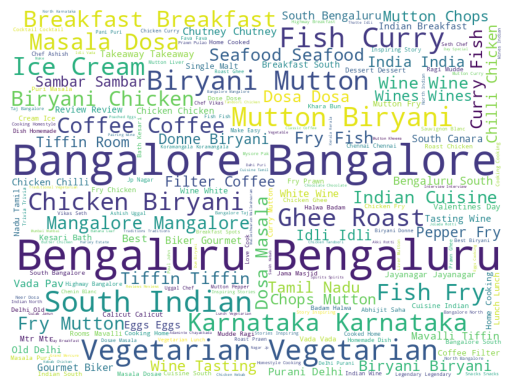

In [46]:
# Generate the word cloud from the list of tags
wc.generate(",".join(filtered_tags))

# Plot the word cloud
plt.imshow(wc)
plt.axis("off")

# Save the word cloud as a PNG file
plt.savefig("word_cloud.png")